# Basic Plot Examples

The drug_nme package comes equipped with basic plotting features. This includes the generation of bar, stacked bar, and donut plots. In order for the plot to be generated, the data sources will need to be preprocessed first. This can be done upon initialization of the Plot() class. 

**Note:** As of this writing, the Plot() class is primarily used for sources from Guide to Pharmacology. 

#### Import modules

In [1]:
from drug_nme import PharmacologyDataFetcher, Plot

#### Download Dataset

For this example, plots will be generated from The Guide to Pharmacology. This source is convenient in that they include a column, named "type", for the drug class. However, the labels may differ from users specific study. The data must be relabeled accordingly. 

Currently, there is a *make_kinase_label()* method that will take the downloaded class and rename Kinase inhibitors from  "Synthetic organic" to "Kinase". 

If interested in other classes, please open an issue/question on the repository. 

In [2]:
extract = PharmacologyDataFetcher()
data = extract.get_data()

data = extract.make_kinase_label()

In [3]:
# View downloaded and relabeled dataset
df = data.copy()
df

,ligandId,name,type,approved,withdrawn,whoEssential,FDA,Year
0,2779,"1,25-dihydroxyvitamin D3",Metabolite,True,False,False,FDA,1978
1,1013,17&beta;-estradiol,Metabolite,True,False,False,FDA,1954
2,4108,5&alpha;-pregnan-3&alpha;-ol-20-one,Metabolite,True,False,False,FDA,2019
3,4784,5-aminolevulinic acid,Metabolite,True,False,False,FDA,1999
4,4789,5-fluorouracil,Synthetic organic,True,False,True,FDA,1962
...,...,...,...,...,...,...,...,...
2029,3177,zoledronic acid,Synthetic organic,True,False,True,FDA,2001
2030,60,zolmitriptan,Synthetic organic,True,False,False,FDA,1997
2031,4348,zolpidem,Synthetic organic,True,False,False,FDA,1992
2032,7047,zonisamide,Synthetic organic,True,False,False,FDA,2000


#### Preprocess the Data

Users can draw plots from all information. However, information from the FDA may stretch back to years (From the Guide to Pharmacology, drug records from U.S. FDA can go back to 1939). 

To continue with the Kinase label example, here we will "slice" the table from kinase. The first FDA approved kinase inhibitor was [imatinib in 2001](https://www.guidetopharmacology.org/GRAC/LigandDisplayForward?tab=clinical&ligandId=5687). As such, the table will extract all FDA approved drugs from >= 2001.   

In [4]:
df = df[df['Year'] >= 2001]
df

,ligandId,name,type,approved,withdrawn,whoEssential,FDA,Year
2,4108,5&alpha;-pregnan-3&alpha;-ol-20-one,Metabolite,True,False,False,FDA,2019
7,8299,abaloparatide,Peptide,True,False,False,FDA,2017
8,1188,abarelix,Peptide,True,False,False,FDA,2003
9,6891,abatacept,Peptide,True,False,False,FDA,2005
11,7382,abemaciclib,Kinase,True,False,False,FDA,2017
...,...,...,...,...,...,...,...,...
2023,10404,zilucoplan,Peptide,True,False,False,FDA,2023
2025,59,ziprasidone,Synthetic organic,True,False,False,FDA,2001
2028,9209,zolbetuximab,Antibody,True,False,False,FDA,2024
2029,3177,zoledronic acid,Synthetic organic,True,False,True,FDA,2001


Next, the information can be processed above depending on users interests from the table. 

An easy way to do it is by giving the parameters upon initialization of the Plot() class. This is optional. 

Here the table is organized by type and year, producing a table with three columns. Importantly, the Count column will be used to generate the plot. 

In [5]:
plot_data = Plot(df, sort_col=['type', 'Year'])

plot_data.show(5)

,type,Year,Count
0,Antibody,2001,1
1,Antibody,2002,2
2,Antibody,2003,3
3,Antibody,2004,3
4,Antibody,2006,2


#### Bar Plot
The drug-nme module contains chart styles to fit the data. The bar chart will plot each group as individual bars.

**NOTE:** As of this writing, the year of 2024 is incomplete. Running the script again should provide a more complete picture of 2024 drug approvals. 

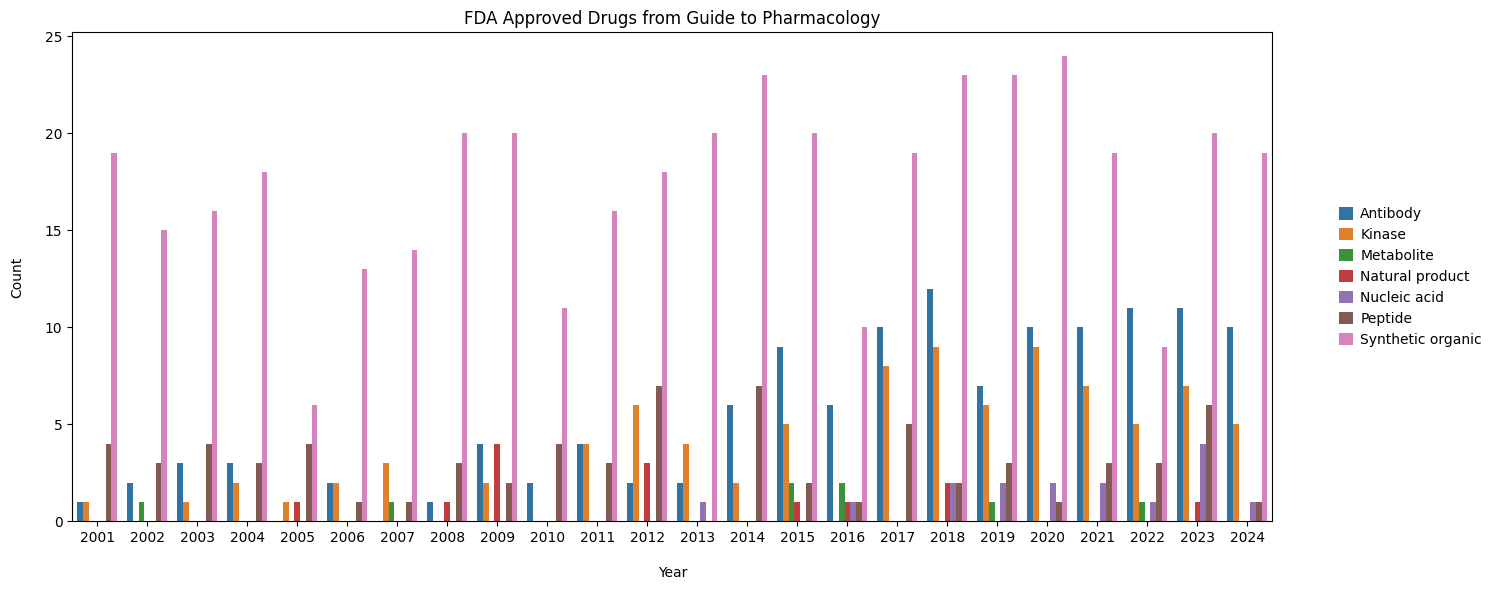

<Axes: title={'center': 'FDA Approved Drugs from Guide to Pharmacology'}, xlabel='Year', ylabel='Count'>

In [6]:
title = 'FDA Approved Drugs from Guide to Pharmacology'
plot_data.bar(figsize=(15,6), legend_loc='out right center', title=title)

# Figure can be saved by passing in the 'savepath' parameter.

#### Stacked Bar Plot
While the bar chart is nice, it can get messy looking across multiple years. Putting them together into a single stacked bar can clean this up nicely.  

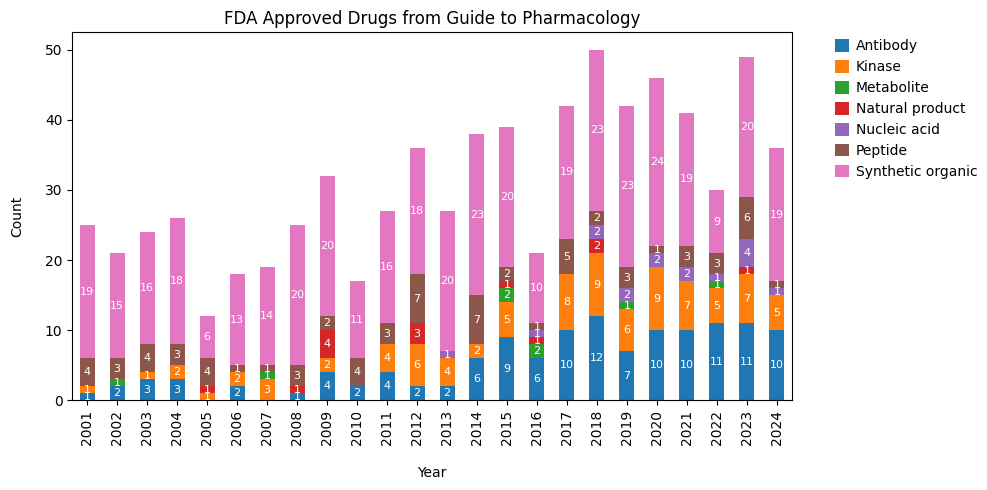

<Axes: title={'center': 'FDA Approved Drugs from Guide to Pharmacology'}, xlabel='Year', ylabel='Count'>

In [7]:
title = 'FDA Approved Drugs from Guide to Pharmacology'
plot_data.stacked(legend_loc='out right upper', fontcolor='white', title=title)

#### Donut Chart 

A Donut chart of the data can also be generated. However, this requires further data processing. This can be done manually using pd.DataFrame.

In this example, the instance variable will be extracted and modified. For the example, the donut chart will focus on drug types for the year 2009. 

In [8]:
# extract instance variable
year_data = plot_data.df

# filter for year 2009
year = year_data[year_data['Year'] == 2009].reset_index(drop=True)
year

,type,Year,Count
0,Antibody,2009,4
1,Kinase,2009,2
2,Natural product,2009,4
3,Peptide,2009,2
4,Synthetic organic,2009,20


Once the table is processed, the donut chart can be drawn. Many of the parameters should be similar across the plots.

Here a palette list was given. This is to ensure that the type labels are consistent with the figure types seen in the 2009 stacked bar plot in the figure above. Ensure that the information is consistent accordingly. 

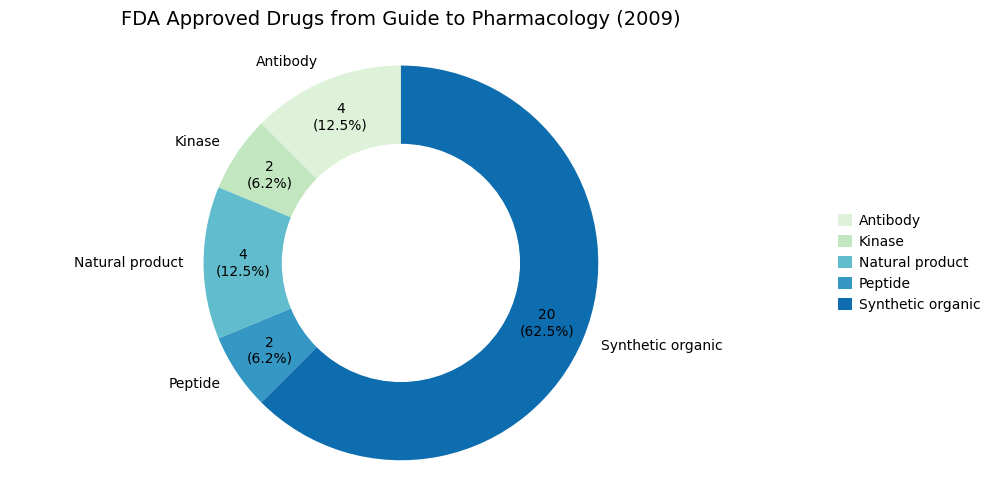

In [9]:
title = 'FDA Approved Drugs from Guide to Pharmacology (2009)'
palette = ['#ddf2d8', '#c2e7c0', '#61bdcd', '#3597c4', '#0d6dae']
plot_data.donut(year, title=title, palette=palette, legend_loc='out right center')

#### Bonus Donut
For those curious, a Donut containing Drugs of all types can also be drawn.

At this timeThe Plot() class can be re-initialized with different columns before drawing the donut chart. Here the table will be manually modified using pandas. Because the inorganic row will interfere with the color palette for the plots generated above, the table will be preprocessed as follows:

In [10]:
data

,ligandId,name,type,approved,withdrawn,whoEssential,FDA,Year
0,2779,"1,25-dihydroxyvitamin D3",Metabolite,True,False,False,FDA,1978
1,1013,17&beta;-estradiol,Metabolite,True,False,False,FDA,1954
2,4108,5&alpha;-pregnan-3&alpha;-ol-20-one,Metabolite,True,False,False,FDA,2019
3,4784,5-aminolevulinic acid,Metabolite,True,False,False,FDA,1999
4,4789,5-fluorouracil,Synthetic organic,True,False,True,FDA,1962
...,...,...,...,...,...,...,...,...
2029,3177,zoledronic acid,Synthetic organic,True,False,True,FDA,2001
2030,60,zolmitriptan,Synthetic organic,True,False,False,FDA,1997
2031,4348,zolpidem,Synthetic organic,True,False,False,FDA,1992
2032,7047,zonisamide,Synthetic organic,True,False,False,FDA,2000


In [11]:
donut_data = Plot(data, sort_col=['type'])

# place inorganic row last
donut_data = donut_data.df.drop(index=[5, 7])
donut_data

,type,Count
0,Antibody,137
1,Inorganic,6
2,Kinase,90
3,Metabolite,43
4,Natural product,48
6,Peptide,117


Once the data is organized, the Donut plot can be generated. 

A palette will be given to ensure color consistency. Additional parameters will be demoed here to adjust and organize the annotations for readability.  

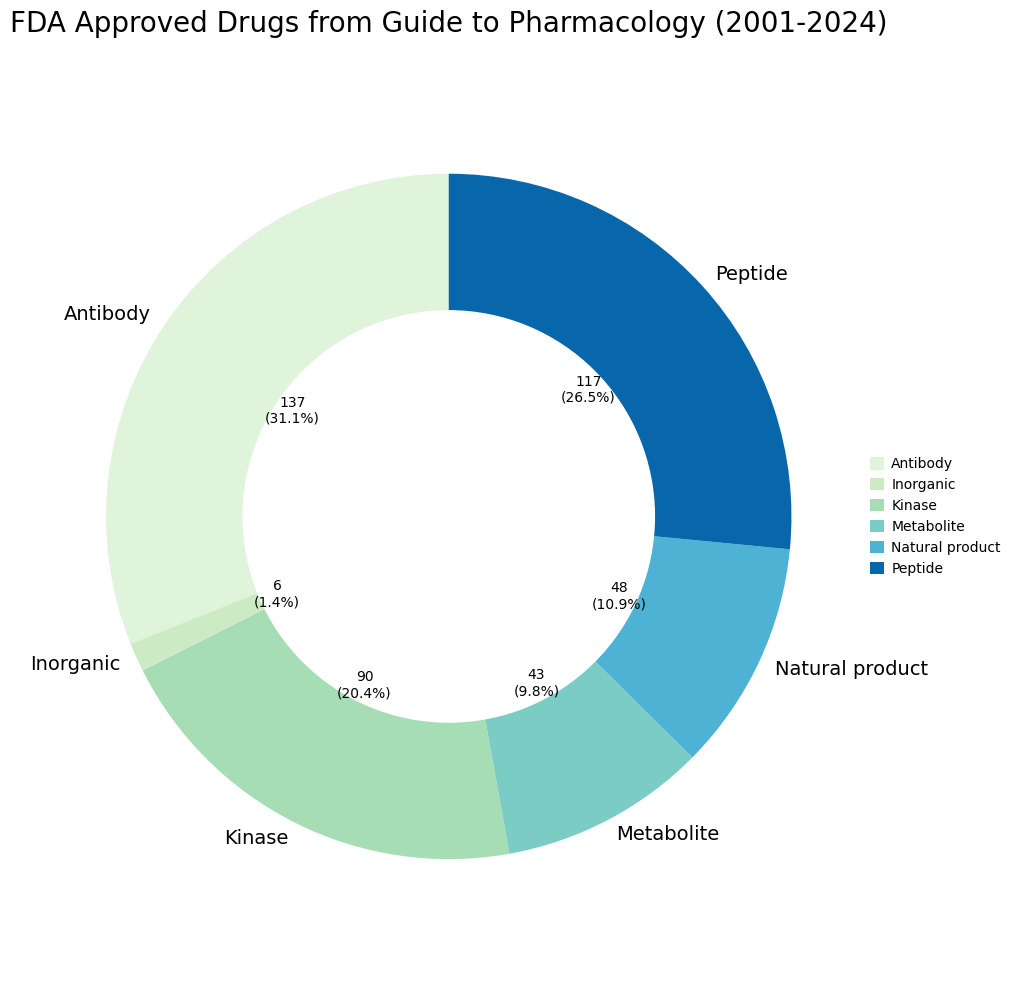

In [12]:
title = 'FDA Approved Drugs from Guide to Pharmacology (2001-2024)'
palette = ['#e0f3db', '#ccebc5', '#a7ddb5', '#7accc4', '#4db2d3', '#0867ab', '#1d6185']

plot_data.donut(donut_data, title=title, palette=palette, legend_loc='out right center', figsize=(10, 10), titlesize=20, fontsize=14, annotsize=10, pctdistance=0.55, labeldistance=1.05)